### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

### Load and Process Data

In [2]:
# Read raw data
df = pd.read_csv('Weight_Loss_2020.csv')
df.head(5)

,Day,Weight,Lean mass,Fat mass,Calories burned,Calories eaten
0,0,61.85,52.3870,9.4631,NaN,NaN
1,1,61.45,52.2325,9.2175,2192.0,933.0
2,2,61.45,52.1711,9.2790,1961.0,1051.0
3,3,60.70,51.7164,8.9836,2276.0,1175.0
4,4,60.70,51.7771,8.9229,2320.0,1600.0


In [3]:
# Calculate changes in mass as well as caloric deficit
df['Weight change'] = 0
df['Lean mass change'] = 0
df['Fat mass change'] = 0
df['Caloric deficit'] = 0
for index,row in df.iterrows():
    if index > 0:
        df['Weight change'][index] = df['Weight'][index] - df['Weight'][index-1]
        df['Lean mass change'][index] = df['Lean mass'][index] - df['Lean mass'][index-1]
        df['Fat mass change'][index] = df['Fat mass'][index] - df['Fat mass'][index-1]
        df['Caloric deficit'][index] = df['Calories burned'][index] - df['Calories eaten'][index]

# Drop the first row with NaNs
df = df.drop(index=0)
df.reset_index(drop=True, inplace=True)
df.head(5)

,Day,Weight,Lean mass,Fat mass,Calories burned,Calories eaten,Weight change,Lean mass change,Fat mass change,Caloric deficit
0,1,61.45,52.2325,9.2175,2192.0,933.0,-0.40,-0.1545,-0.2456,1259
1,2,61.45,52.1711,9.2790,1961.0,1051.0,0.00,-0.0614,0.0615,910
2,3,60.70,51.7164,8.9836,2276.0,1175.0,-0.75,-0.4547,-0.2954,1101
3,4,60.70,51.7771,8.9229,2320.0,1600.0,0.00,0.0607,-0.0607,720
4,5,60.90,51.7650,9.1350,2304.0,1400.0,0.20,-0.0121,0.2121,904


### Analyze data

#### Plot raw data

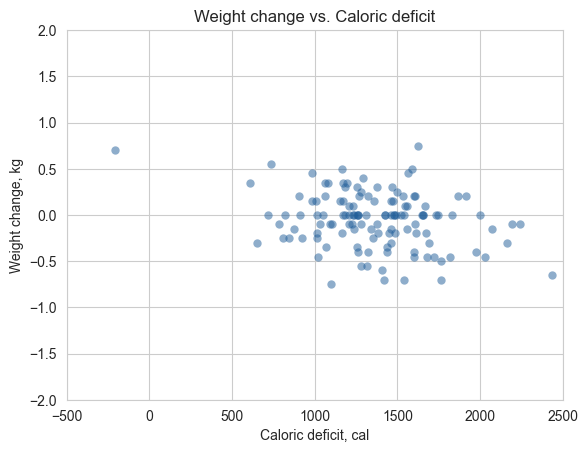

In [4]:
# Plot Weight change vs Caloric deficit
sns.set_style("whitegrid")
plt.scatter(df['Caloric deficit'], df['Weight change'], color = '#1f5d99', alpha=0.5, linewidth=0.0)
plt.xlabel('Caloric deficit, cal')
plt.ylabel('Weight change, kg')
plt.title('Weight change vs. Caloric deficit')
plt.xticks(np.arange(-500, 3000, step=500))
plt.yticks(np.arange(-2, 2.5, step=0.5))
plt.xlim([-500, 2500])
plt.ylim([-2, 2])

#plt.savefig("Plots/plot1.png", dpi=400)
plt.show()

R2:  0.07705435512128667
y=-0.00022x + 0.2554


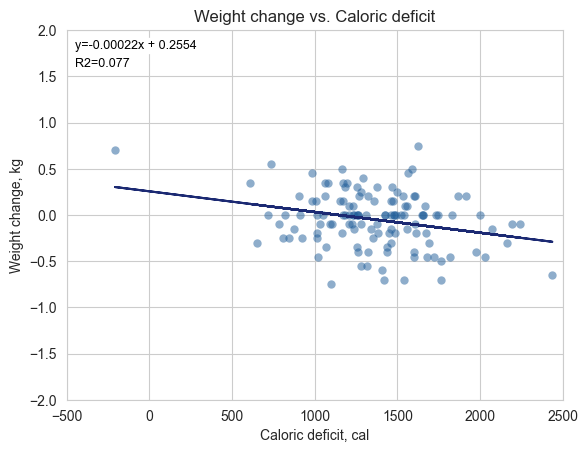

In [5]:
# Linear regression of Weight change vs Caloric deficit
X = df['Caloric deficit'].values.reshape(-1, 1)
Y = df['Weight change'].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
r2 = linear_regressor.score(X, Y) # estimate R^2
#y = kx + b
k = linear_regressor.coef_[0][0]
b = linear_regressor.intercept_[0]
equation = "y=%.5f" % k + "x + %.4f" % b if b > 0 else "y=%.5f" % k + "x %.4f" % b
print("R2: ", r2)
print(equation)

plt.scatter(df['Caloric deficit'], df['Weight change'], color = '#1f5d99', alpha=0.5, linewidth=0.0)
#plt.plot(X, Y_pred, color='white', linewidth=2.5, antialiased=True) # add white shadow
plt.plot(X, Y_pred, color='#1c2a73', antialiased=True)
plt.xlabel('Caloric deficit, cal')
plt.ylabel('Weight change, kg')
plt.title('Weight change vs. Caloric deficit')
plt.xticks(np.arange(-500, 3000, step=500))
plt.yticks(np.arange(-2, 2.5, step=0.5))
plt.xlim([-500, 2500])
plt.ylim([-2, 2])
plt.text(-500+50, 2-0.2, equation, color='black', fontsize=9, bbox=dict(facecolor='white', edgecolor='white', pad=1))
plt.text(-500+50, 2-0.4, "R2=%.3f" % r2, color='black', fontsize=9, bbox=dict(facecolor='white', edgecolor='white', pad=1))

#plt.savefig("Plots/plot2.png", dpi=400)
plt.show()

R2:  0.0594250993917832
y=-0.00011x + 0.1168


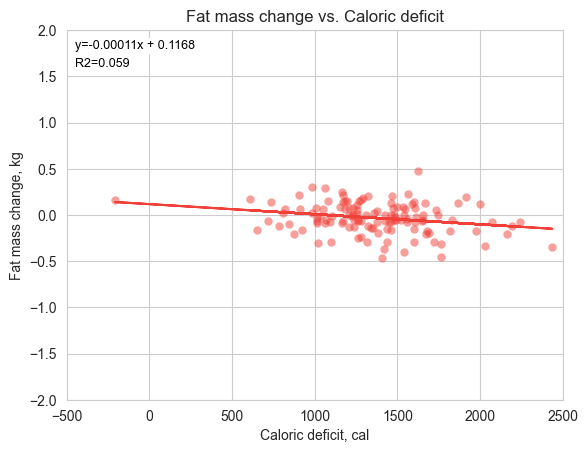

In [6]:
# Linear regression of Fat mass change vs Caloric deficit
X = df['Caloric deficit'].values.reshape(-1, 1)
Y = df['Fat mass change'].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
r2 = linear_regressor.score(X, Y) # estimate R^2
#y = kx + b
k = linear_regressor.coef_[0][0]
b = linear_regressor.intercept_[0]
equation = "y=%.5f" % k + "x + %.4f" % b if b > 0 else "y=%.5f" % k + "x %.4f" % b
print("R2: ", r2)
print(equation)

plt.scatter(df['Caloric deficit'], df['Fat mass change'], color = '#f04039', alpha=0.5, linewidth=0.0)
#plt.plot(X, Y_pred, color='white', linewidth=2.5, antialiased=True) # add white shadow
plt.plot(X, Y_pred, color='#f04039')
plt.xlabel('Caloric deficit, cal')
plt.ylabel('Fat mass change, kg')
plt.title('Fat mass change vs. Caloric deficit')
plt.xticks(np.arange(-500, 3000, step=500))
plt.yticks(np.arange(-2, 2.5, step=0.5))
plt.xlim([-500, 2500])
plt.ylim([-2, 2])
plt.text(-500+50, 2-0.2, equation, color='black', fontsize=9, bbox=dict(facecolor='white', edgecolor='white', pad=1))
plt.text(-500+50, 2-0.4, "R2=%.3f" % r2, color='black', fontsize=9, bbox=dict(facecolor='white', edgecolor='white', pad=1))

#plt.savefig("Plots/plot3.png", dpi=400)
plt.show()

#### Average observations using windows of multiple days

In [7]:
# Average observations using windows of multiple days

# Specify number of rows in each chunk
n=5

df['Group'] = 0
n_groups = int(np.ceil(len(df)/n))
groups = [i for i in range(1,n_groups)]
group_list = [[item]*n for item in groups]
flat_group_list = [item for sublist in group_list for item in sublist]
n_missing = len(df)-len(flat_group_list)
if n_missing > 0:
    flat_group_list.extend([flat_group_list[-1]]*n_missing)
    
df['Group'] = flat_group_list
df_grouped = df.groupby(by=['Group']).mean()
df_grouped

,Day,Weight,Lean mass,Fat mass,Calories burned,Calories eaten,Weight change,Lean mass change,Fat mass change,Caloric deficit
Group,,,,,,,,,,
1,3.0,61.040,51.93242,9.10760,2210.6,1231.8,-0.190,-0.12440,-0.06562,978.8
2,8.0,61.120,52.03742,9.08258,2131.4,1268.6,0.100,0.08500,0.01500,862.8
3,13.0,61.190,52.20720,8.98280,2344.6,1178.4,-0.030,0.02350,-0.05350,1166.2
4,18.0,61.020,52.14772,8.87232,2171.6,1099.4,-0.030,-0.03784,0.00784,1072.2
5,23.0,60.790,51.86602,8.92402,2310.2,1064.6,-0.070,-0.04756,-0.02244,1245.6
6,28.0,60.740,51.95568,8.78434,2269.8,1279.0,0.110,0.08168,0.02832,990.8
7,33.0,60.600,51.77636,8.82368,2274.2,1002.2,-0.180,-0.09314,-0.08686,1272.0
8,38.0,60.660,51.82766,8.83240,2201.4,1153.6,-0.010,-0.02064,0.01066,1047.8
9,43.0,60.250,51.72868,8.52134,2659.4,1054.4,-0.140,-0.06034,-0.07968,1605.0


R2:  0.1819161038230187
y=-0.00015x + 0.1512


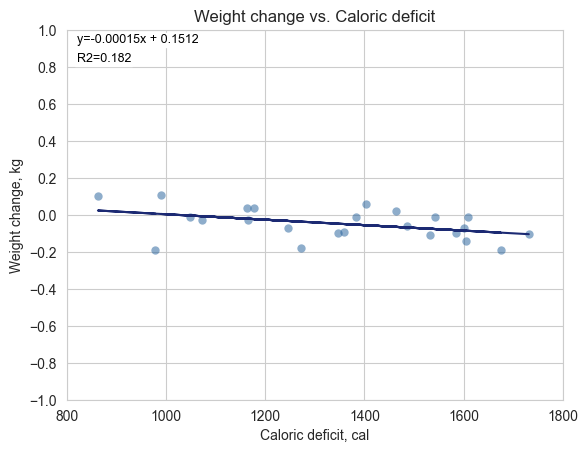

In [8]:
# Linear regression of Weight change vs Caloric deficit
X = df_grouped['Caloric deficit'].values.reshape(-1, 1)
Y = df_grouped['Weight change'].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
r2 = linear_regressor.score(X, Y) # estimate R^2
#y = kx + b
k = linear_regressor.coef_[0][0]
b = linear_regressor.intercept_[0]
equation = "y=%.5f" % k + "x + %.4f" % b if b > 0 else "y=%.5f" % k + "x %.4f" % b
print("R2: ", r2)
print(equation)

plt.scatter(X, Y, color = '#1f5d99', alpha=0.5, linewidth=0.0)
#plt.plot(X, Y_pred, color='white', linewidth=2.5, antialiased=True) # add white shadow
plt.plot(X, Y_pred, color='#1c2a73')
plt.xlabel('Caloric deficit, cal')
plt.ylabel('Weight change, kg')
plt.title('Weight change vs. Caloric deficit')
plt.xticks(np.arange(800, 2000, step=200))
plt.yticks(np.arange(-1, 1.2, step=0.2))
plt.xlim([800, 1800])
plt.ylim([-1, 1])
plt.text(800+20, 1-0.07, equation, color='black', fontsize=9, bbox=dict(facecolor='white', edgecolor='white', pad=1))
plt.text(800+20, 1-0.17, "R2=%.3f" % r2, color='black', fontsize=9, bbox=dict(facecolor='white', edgecolor='white', pad=1))

#plt.savefig("Plots/plot4.png", dpi=400)
plt.show()

R2:  0.19006722503777307
y=-0.00008x + 0.0704


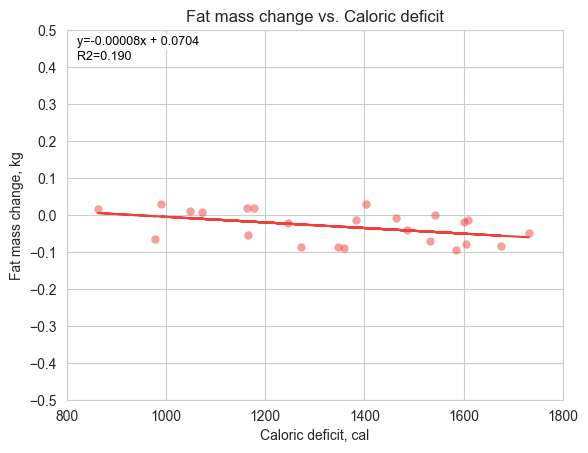

In [9]:
# Linear regression of Fat mass change vs Caloric deficit
X = df_grouped['Caloric deficit'].values.reshape(-1, 1)
Y = df_grouped['Fat mass change'].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
r2 = linear_regressor.score(X, Y) # estimate R^2
#y = kx + b
k = linear_regressor.coef_[0][0]
b = linear_regressor.intercept_[0]
equation = "y=%.5f" % k + "x + %.4f" % b if b > 0 else "y=%.5f" % k + "x %.4f" % b
print("R2: ", r2)
print(equation)


plt.scatter(X, Y, color = '#f04039', alpha=0.5, linewidth=0.0)
#plt.plot(X, Y_pred, color='white', linewidth=2.5, antialiased=True) # add white shadow
plt.plot(X, Y_pred, color='#f04039')
plt.xlabel('Caloric deficit, cal')
plt.ylabel('Fat mass change, kg')
plt.title('Fat mass change vs. Caloric deficit')
plt.xticks(np.arange(800, 2000, step=200))
plt.yticks(np.arange(-0.5, 0.6, step=0.1))
plt.xlim([800, 1800])
plt.ylim([-0.5, 0.5])
plt.text(800+20, 0.5-0.04, equation, color='black', fontsize=9, bbox=dict(facecolor='white', edgecolor='white', pad=1))
plt.text(800+20, 0.5-0.08, "R2=%.3f" % r2, color='black', fontsize=9, bbox=dict(facecolor='white', edgecolor='white', pad=1))

#plt.savefig("Plots/plot5.png", dpi=400)
plt.show()